Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Train Set Evaluation:
MAE: 0.791
MSE: 2.500
R² Score: 0.691

Test Set Evaluation:
MAE: 0.806
MSE: 2.538
R² Score: 0.691

                  Feature  Importance
5   age_group_clean_15-19    0.377462
6   age_group_clean_20-24    0.371163
7   age_group_clean_25-29    0.082359
12     age_group_clean_60    0.030071
2            time_index_q    0.026751
3        sex_clean_female    0.025294
11  age_group_clean_50-59    0.024295
10  age_group_clean_40-49    0.024019
0                    year    0.019961
4          sex_clean_male    0.006992
9   age_group_clean_35-39    0.006907
1             quarter_num    0.004050
8   age_group_clean_30-34    0.000676


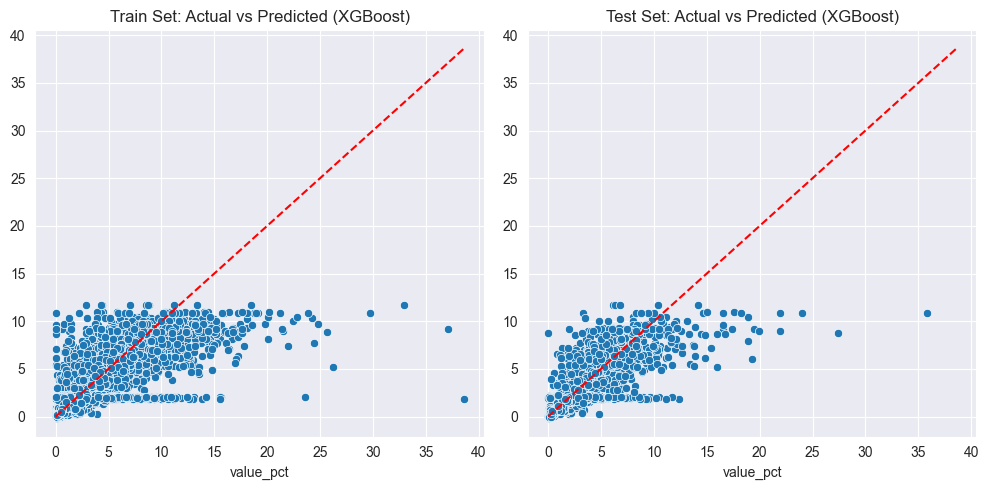

In [2]:
# ------------------------------
# 1. Import Libraries
# ------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 2. Load Data
# ------------------------------
df = pd.read_csv(r'C:\Users\ACER\PycharmProjects\PythonProject\data\unemployment_ml_ready_clean1.csv')

# ------------------------------
# 3. Select Features and Target
# ------------------------------
features = [
    'year', 'quarter_num', 'time_index_q',
    'sex_clean_female', 'sex_clean_male',
    'age_group_clean_15-19', 'age_group_clean_20-24',
    'age_group_clean_25-29', 'age_group_clean_30-34',
    'age_group_clean_35-39', 'age_group_clean_40-49',
    'age_group_clean_50-59', 'age_group_clean_60'
]
X = df[features]
y = df['value_pct']

# ------------------------------
# 4. Split Train/Test
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost ไม่จำเป็นต้อง scale features

# ------------------------------
# 5. XGBoost Regressor + Hyperparameter Tuning
# ------------------------------
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# กำหนด grid ของ hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print("Best parameters for XGBoost:", grid_search.best_params_)

# ------------------------------
# 6. Predict และ Evaluate
# ------------------------------
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

def evaluate(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Evaluation:")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R² Score: {r2:.3f}\n")

evaluate(y_train, y_train_pred, "Train Set")
evaluate(y_test, y_test_pred, "Test Set")

# ------------------------------
# 7. Feature Importance
# ------------------------------
importances = best_xgb.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp)

# ------------------------------
# 8. Visualization: Actual vs Predicted
# ------------------------------
plt.figure(figsize=(10,5))

# Train Set
plt.subplot(1,2,1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Train Set: Actual vs Predicted (XGBoost)')

# Test Set
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Test Set: Actual vs Predicted (XGBoost)')

plt.tight_layout()
plt.show()
